In [2]:
import numpy as np
import pandas as pd
import seaborn as sb

from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf

from pandas.plotting import lag_plot
from matplotlib import pyplot

from statsmodels.tsa.stattools import adfuller
from numpy import log

from statsmodels.tsa.ar_model import AutoReg
from math import sqrt

from statsmodels.tsa.arima.model import ARIMA

In [3]:
dT_data1_hierarchical_pivoted = pd.read_csv('dT_data1_hierarchical_pivoted.csv')
dT_data1_hierarchical_pivoted

SUBZONE_N  PLN_AREA_N REGION_C      region_pln  \
0     ANG MO KIO TOWN CENTRE  ANG MO KIO      NER  NER_ANG MO KIO   
1     ANG MO KIO TOWN CENTRE  ANG MO KIO      NER  NER_ANG MO KIO   
2     ANG MO KIO TOWN CENTRE  ANG MO KIO      NER  NER_ANG MO KIO   
3     ANG MO KIO TOWN CENTRE  ANG MO KIO      NER  NER_ANG MO KIO   
4     ANG MO KIO TOWN CENTRE  ANG MO KIO      NER  NER_ANG MO KIO   
...                      ...         ...      ...             ...   
3195             YISHUN WEST      YISHUN       NR       NR_YISHUN   
3196             YISHUN WEST      YISHUN       NR       NR_YISHUN   
3197             YISHUN WEST      YISHUN       NR       NR_YISHUN   
3198             YISHUN WEST      YISHUN       NR       NR_YISHUN   
3199             YISHUN WEST      YISHUN       NR       NR_YISHUN   

                         region_pln_subzone  Male Percentage  00 - 19  \
0     NER_ANG MO KIO_ANG MO KIO TOWN CENTRE         0.469854     1010   
1     NER_ANG MO KIO_ANG MO KIO TOWN CENTRE         0.466805     1030   
2     NER_ANG MO KIO_ANG MO KIO TOWN CENTRE         0.468880     1050   
3     NER_ANG MO KIO_ANG MO KIO TOWN CENTRE         0.471660     1090   
4     NER_ANG MO KIO_ANG MO KIO TOWN CENTRE         0.471888     1120   
...                                     ...              ...      ...   
3195                  NR_YISHUN_YISHUN WEST         0.497408    11310   
3196                  NR_YISHUN_YISHUN WEST         0.497263    11690   
3197                  NR_YISHUN_YISHUN WEST         0.498234    12270   
3198                  NR_YISHUN_YISHUN WEST         0.499080    12670   
3199                  NR_YISHUN_YISHUN WEST         0.499500    13150   

      20 - 39  40 - 59  60 & Over  Average Income        Year  
0        1170     1560       1080    14031.765690  2020-12-31  
1        1160     1590       1030    13907.732218  2019-12-31  
2        1160     1590       1020    13743.987448  2018-12-31  
3        1260     1590       1000    13602.922449  2017-12-31  
4        1290     1600        970    13539.979798  2016-12-31  
...       ...      ...        ...             ...         ...  
3195    16930    19310      10350     7975.623628  2015-12-31  
3196    17580    19390       9800     7718.863448  2014-12-31  
3197    18140    19840       9220     7726.745677  2013-12-31  
3198    18490    19890       8680     7745.710815  2012-12-31  
3199    18810    19920       8140     7804.505627  2011-12-31  

[3200 rows x 12 columns]

### Test train split

In time series machine learning analysis, our observations are not independent, and thus we cannot split the data randomly as we do in non-time-series analysis. Instead, we usually split observations along with the sequences.

In [4]:
X_total_grouped = pd.read_csv('total_Singapore.csv')
X_total_grouped = X_total_grouped.iloc[::-1]
X_total_grouped["Year"] = pd.to_datetime(X_total_grouped["Year"])
X_total_grouped.set_index('Year', inplace=True)
X_total_grouped

Male Percentage  00 - 19  20 - 39  40 - 59  60 & Over  \
Year                                                                
2011-12-31         0.493018   897650  1131400  1199410     560820   
2012-12-31         0.492390   885170  1128460  1211950     592640   
2013-12-31         0.491970   870310  1124880  1222980     626600   
2014-12-31         0.491485   855300  1123900  1228440     663110   
2015-12-31         0.491105   845320  1126850  1230320     700210   
2016-12-31         0.490530   835940  1128380  1229820     739440   
2017-12-31         0.490078   827450  1129570  1229430     779330   
2018-12-31         0.489659   817650  1132270  1224840     819550   
2019-12-31         0.489140   813290  1131540  1220880     860520   
2020-12-31         0.488985   803440  1128860  1212930     899010   

            Average Income  
Year                        
2011-12-31           10702  
2012-12-31           10718  
2013-12-31           10742  
2014-12-31           10774  
2015-12-31           10819  
2016-12-31           10890  
2017-12-31           10985  
2018-12-31           11071  
2019-12-31           11130  
2020-12-31           11175

In [5]:
X_train_grouped = X_total_grouped[:-2]
X_train_grouped
#X_train_grouped contains aggregated data from 2011-2018.

Male Percentage  00 - 19  20 - 39  40 - 59  60 & Over  \
Year                                                                
2011-12-31         0.493018   897650  1131400  1199410     560820   
2012-12-31         0.492390   885170  1128460  1211950     592640   
2013-12-31         0.491970   870310  1124880  1222980     626600   
2014-12-31         0.491485   855300  1123900  1228440     663110   
2015-12-31         0.491105   845320  1126850  1230320     700210   
2016-12-31         0.490530   835940  1128380  1229820     739440   
2017-12-31         0.490078   827450  1129570  1229430     779330   
2018-12-31         0.489659   817650  1132270  1224840     819550   

            Average Income  
Year                        
2011-12-31           10702  
2012-12-31           10718  
2013-12-31           10742  
2014-12-31           10774  
2015-12-31           10819  
2016-12-31           10890  
2017-12-31           10985  
2018-12-31           11071

In [6]:
X_test_grouped = X_total_grouped[-2:]
X_test_grouped
#X_test_grouped contains aggregated data from 2019-2020.

Male Percentage  00 - 19  20 - 39  40 - 59  60 & Over  \
Year                                                                
2019-12-31         0.489140   813290  1131540  1220880     860520   
2020-12-31         0.488985   803440  1128860  1212930     899010   

            Average Income  
Year                        
2019-12-31           11130  
2020-12-31           11175

## EXPLORING THE DATA – "00 - 19"

### Check for autocorrelation, randomness, seasonality (Lag plot)

A lag plot is a special type of scatter plot with the two variables (X,Y) “lagged.”

A “lag” is a fixed amount of passing time; One set of observations in a time series is plotted (lagged) against a second, later set of data. 

Lag plots allow you to check for: model suitability, outliers (data points with extremely high or low values), randomness (data without a pattern), serial correlation (where error terms in a time series transfer from one period to another), seasonality (periodic fluctuations in time series data that happens at regular periods).

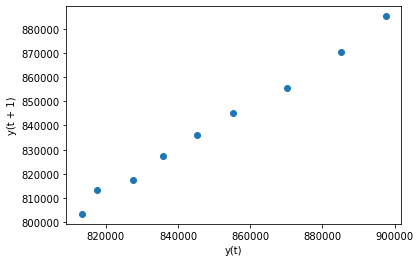

          t-1       t+1
t-1  1.000000  0.997041
t+1  0.997041  1.000000


In [7]:
lag_plot(X_total_grouped["00 - 19"])
pyplot.show()

values = DataFrame(X_total_grouped['00 - 19'].values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

From the lag plot, we can tell that autocorrelation is present for 00 - 19.

### Checking for stationarity (Time series plots, Augmented Dickey-Fuller test)

A stationary series is one in which the properties – mean, variance and covariance, do not vary with time. Stationarity is important in forecasting as most time series models assume that each point is independent of one another. 
We will do both a visual and statistical test for stationarity.

Note we cannot do rolling mean and sd due to a lack of data points.

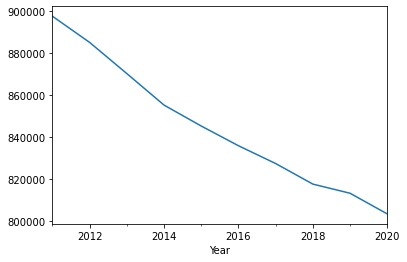

In [8]:
X_total_grouped["00 - 19"].plot()
pyplot.show()

The graph (visual test) shows that the time series does not exhibit stationarity.

ADF Statistic: -9.069427
p-value: 0.000000
Critical Values:
	1%: -5.354
	5%: -3.646
	10%: -2.901


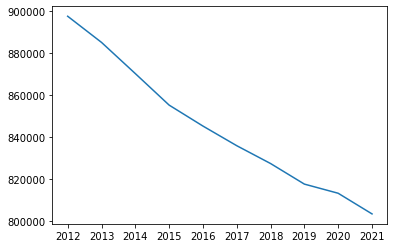

In [12]:
def ADFtest(data):
    pyplot.plot(data)
    series = data
    X = series.values
    result = adfuller(X)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
        
ADFtest(X_total_grouped['00 - 19'])

However, the Dickey-Fuller test (statistical) gives us a test statistic of -9, which is less than the value of -5.354 at 1%. Hence we reject the null hypothesis and conclude that the process has no unit root, and in turn that the time series is stationary or does not have time-dependent structure.

Note that the graph is re-printed as we are re-factoring the ADF code into a function for future reusuability in testing our differencing (see below)

### Applying differencing regardless (to see if it will improve predictions)

Even though the statistical test tells us the time series has stationarity, but the visual test indicates otherwise. 
The statistical test may have returned negative due to insufficient data. Hence, we will apply a log transform to make the time series exhibit stationarity, and compare the R2 values.

ADF Statistic: -11.425412
p-value: 0.000000
Critical Values:
	1%: -5.354
	5%: -3.646
	10%: -2.901


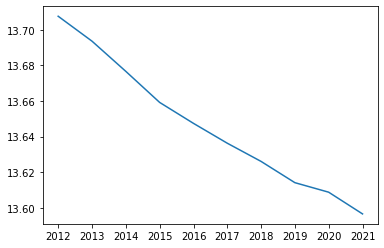

In [13]:
# log transform
data = X_total_grouped
data["00 - 19 - log"] = np.log(data["00 - 19"])
ADFtest(data["00 - 19 - log"])

Log transforming has given us a better ADF statistic. We will hence add it to the dataframe for R2 testing later

ADF Statistic: -0.863617
p-value: 0.799718
Critical Values:
	1%: -4.939
	5%: -3.478
	10%: -2.844


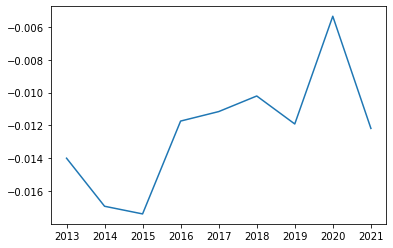

In [14]:
# log transform and subtract the previous value when time shifting
df_log_shift = data["00 - 19 - log"] - data["00 - 19 - log"].shift()
df_log_shift.dropna(inplace=True)
ADFtest(df_log_shift)

This has given us a worse ADF statistic. We will hence NOT add it to the dataframe for R2 testing later

### Determining lag variables (Autocorrelation Plots)
We can plot the correlation coefficient for each lag variable.

This can very quickly give an idea of which lag variables may be good candidates for use in a predictive model and how the relationship between the observation and its historic values changes over time.

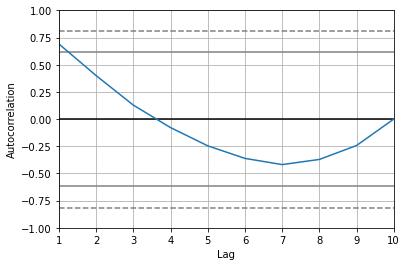

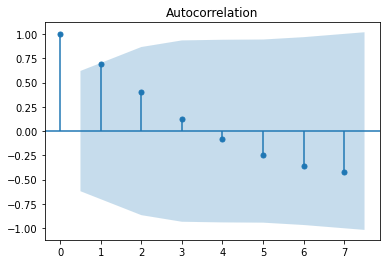

In [15]:
autocorrelation_plot(X_total_grouped['00 - 19'])
pyplot.show()

plot_acf(X_total_grouped['00 - 19'], lags=7)
pyplot.show()

From the ACF plots, the best lag variable is 1

## AUTOREGRESSION – "00 - 19"

### Persistence Model / "baseline" (using walk-forward validation)

Test MSE: 58016050.000
Test R2:  -1.3918596201911928


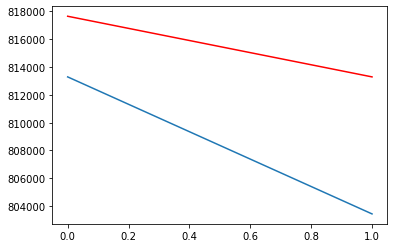

In [16]:
# Persistence Model

series = X_total_grouped["00 - 19"]

# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
# split into train and test sets
X = dataframe.values
train, test = X[1:len(X)-2], X[len(X)-2:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

# persistence model
def model_persistence(x):
    return x
 
# walk-forward validation
predictions = []
for x in test_X:
    yhat = model_persistence(x)
    predictions.append(yhat)
test_score = mean_squared_error(test_y, predictions)
print('Test MSE: %.3f' % test_score)
test_r2 = r2_score(test_y, predictions)
print('Test R2: ', test_r2 )
# plot predictions vs expected
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')
pyplot.show()

### Static autoregressive model (on the original data)

We can use AR model to make a prediction by calling the predict() function for a number of observations in the future. This creates 1 2-year forecast, which is different from the persistence example above.

Coefficients: [5.75307396e+04 9.19776642e-01]
predicted=809586.110819, expected=813290.000000
predicted=802169.133908, expected=803440.000000
Test RMSE: 2768.925
Test R2:  0.6839105220356755


C:\.SOFTWARE\Anaconda\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


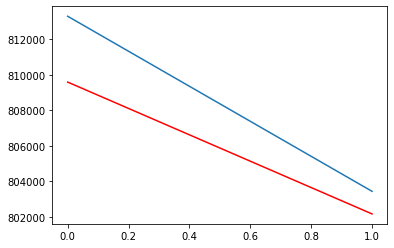

In [17]:
# Static autoregressive model

train = X_train_grouped["00 - 19"].values
test = X_test_grouped["00 - 19"].values

# train autoregression
model = AutoReg(train, lags=1) # lags set to 1, the parameter found to be the best just now
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
test_r2 = r2_score(test, predictions)
print('Test R2: ', test_r2 )
# plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

###### R2 for AR on "00 - 19": 0.6839

### Static autoregressive model (on the log transformed data)

Now we do the same thing but on our log transformed data to compare the R2

Coefficients: [1.42450463 0.89472231]
predicted=13.605424, expected=13.608843
predicted=13.597581, expected=13.596658
Test RMSE: 0.003
Test R2:  0.831050133529146


C:\.SOFTWARE\Anaconda\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


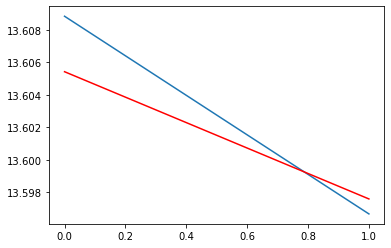

In [18]:
# Static autoregressive model
# We can use AR model to make a prediction by calling the predict() function for a number of observations in the future. 
# This creates 1 2-year forecast, which is different from the persistence example above.

train = data["00 - 19 - log"][1:-2].values
test = data["00 - 19 - log"][-2:].values

# train autoregression
model = AutoReg(train, lags=1) # lags set to 1, the parameter found to be the best just now
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
test_r2 = r2_score(test, predictions)
print('Test R2: ', test_r2 )
# plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

###### R2 for AR on "00 - 19": 0.83105. This is an improvement over the non-transformed data.

Hence, we can conclude that the visual test triumphs the statistical test, and that transformations should be applied regardless of the results of the ADF test for our dataset (given that it has very few data points)

### ARIMA

ARIMA, short for ‘Auto Regressive Integrated Moving Average’ is actually a class of models that ‘explains’ a given time series based on its own past values, that is, its own lags and the lagged forecast errors, so that equation can be used to forecast future values.

Any ‘non-seasonal’ time series that exhibits patterns and is not a random white noise can be modeled with ARIMA models.

An ARIMA model is characterized by 3 terms: p, d, q

where,

p is the order of the AR term

q is the order of the MA term

d is the number of differencing required to make the time series stationary

For demonstration purposes, we take p,q,d to be 1,1,1

predicted=809495.304864, expected=813290.000000
predicted=806963.692194, expected=803440.000000
Test RMSE: 3661.702
Test R2:  0.4472185760446611


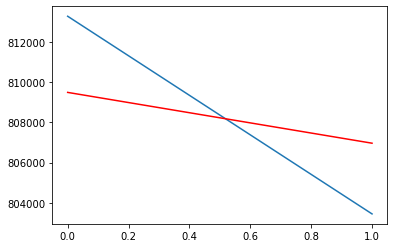

In [19]:
# evaluate an ARIMA model using a walk-forward validation

train = data["00 - 19"][:-2].values
test = data["00 - 19"][-2:].values

history = [x for x in train]
predictions = []

# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(1,1,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
test_r2 = r2_score(test, predictions)
print('Test R2: ', test_r2 )
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

Test R2: 0.44722. This low R2 either suggests that the hyperparameters (currently 1,1,1) need to be tuned, or that AR is better

### Hyperparameter tuning for ARIMA (grid search)

In [20]:
#refactor the ARIMA into a function

def evaluate_ARIMA(X, arima_order):
    
    train = X[:-2].values
    test = X[-2:].values

    history = [x for x in train]
    predictions = []

    # walk-forward validation
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
        print('predicted=%f, expected=%f' % (yhat, obs))
    # evaluate forecasts
    rmse = sqrt(mean_squared_error(test, predictions))
    print('Test RMSE: %.3f' % rmse)
    test_r2 = r2_score(test, predictions)
    print('Test R2: ', test_r2 )
    # plot forecasts against actual outcomes
    pyplot.plot(test)
    pyplot.plot(predictions, color='red')
    pyplot.show()
    return test_r2

predicted=809495.304864, expected=813290.000000
predicted=806963.692194, expected=803440.000000
Test RMSE: 3661.702
Test R2:  0.4472185760446611


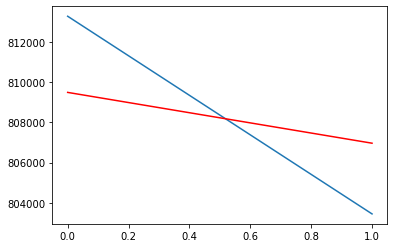

0.4472185760446611

In [21]:
#testing
evaluate_ARIMA(data["00 - 19"], (1,1,1))

In [24]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = 0, None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    test_r2 = evaluate_ARIMA(dataset, order)
                    if test_r2 > best_score:
                        best_score, best_cfg = test_r2, order
                    print('ARIMA%s R2=%.3f' % (order,test_r2))
                except:
                    continue
    print('Best ARIMA%s R2=%.3f' % (best_cfg, best_score))

predicted=854348.750000, expected=813290.000000
predicted=849788.471470, expected=803440.000000
Test RMSE: 43783.569
Test R2:  -78.03325346573946


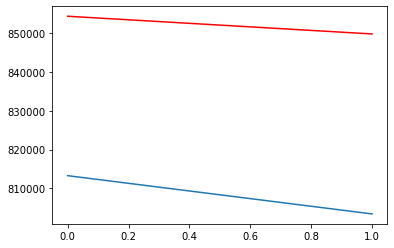

ARIMA(0, 0, 0) R2=-78.033
predicted=835432.579514, expected=813290.000000
predicted=834689.346610, expected=803440.000000
Test RMSE: 27081.502
Test R2:  -29.23660597340737


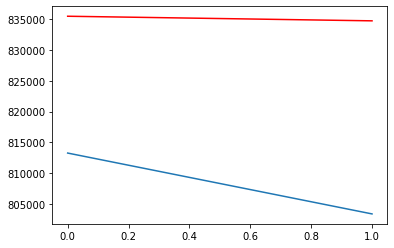

ARIMA(0, 0, 1) R2=-29.237
predicted=nan, expected=813290.000000
predicted=823422.818487, expected=803440.000000
predicted=817650.000000, expected=813290.000000
predicted=813290.000000, expected=803440.000000
Test RMSE: 7616.827
Test R2:  -1.3918597188017094


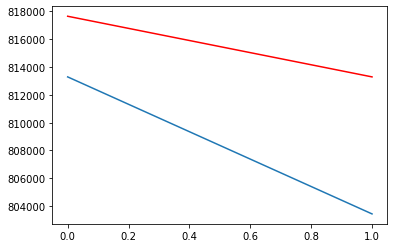

ARIMA(0, 1, 0) R2=-1.392
predicted=817783.688674, expected=813290.000000
predicted=813350.302995, expected=803440.000000
Test RMSE: 7694.392
Test R2:  -1.4408224532402247


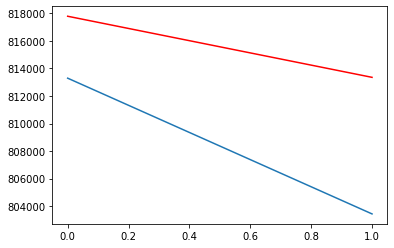

ARIMA(0, 1, 1) R2=-1.441
predicted=817983.404478, expected=813290.000000
predicted=nan, expected=803440.000000
predicted=807850.000000, expected=813290.000000
predicted=808930.000000, expected=803440.000000
Test RMSE: 5465.057
Test R2:  -0.2313371117560199


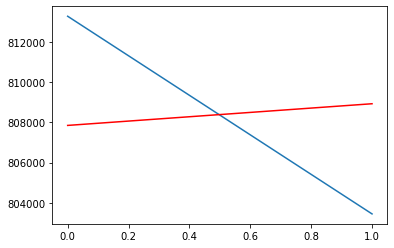

ARIMA(0, 2, 0) R2=-0.231
predicted=807845.256165, expected=813290.000000
predicted=808946.791101, expected=803440.000000
Test RMSE: 5475.855
Test R2:  -0.23620781026456883


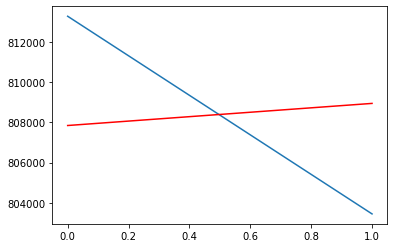

ARIMA(0, 2, 1) R2=-0.236
predicted=807845.027920, expected=813290.000000
predicted=808948.386976, expected=803440.000000
Test RMSE: 5476.771
Test R2:  -0.23662141245327706


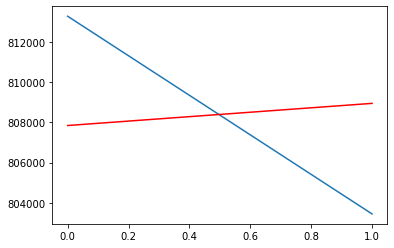

ARIMA(0, 2, 2) R2=-0.237
predicted=819354.814467, expected=813290.000000
predicted=814769.817660, expected=803440.000000
Test RMSE: 9086.989
Test R2:  -2.404297962501245


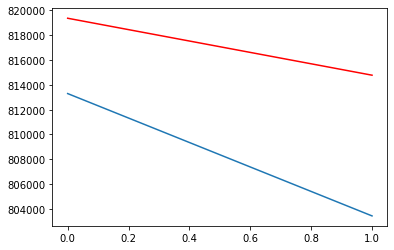

ARIMA(1, 0, 0) R2=-2.404
predicted=812128.270369, expected=813290.000000
predicted=816105.865281, expected=803440.000000
Test RMSE: 8993.713
Test R2:  -2.3347680323651563


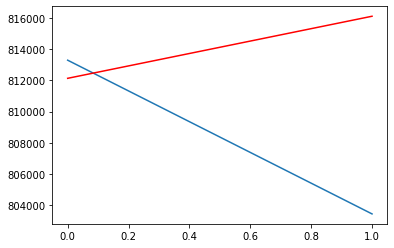

ARIMA(1, 0, 1) R2=-2.335
predicted=817777.140491, expected=813290.000000
predicted=813352.579710, expected=803440.000000
Test RMSE: 7693.948
Test R2:  -1.4405405175087718


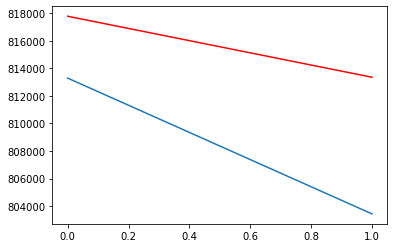

ARIMA(1, 1, 0) R2=-1.441
predicted=809495.304864, expected=813290.000000
predicted=806963.692194, expected=803440.000000
Test RMSE: 3661.702
Test R2:  0.44721855325483617


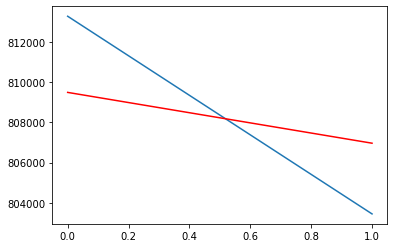

ARIMA(1, 1, 1) R2=0.447
predicted=810506.923851, expected=813290.000000
predicted=807845.440224, expected=813290.000000
predicted=808947.041260, expected=803440.000000
Test RMSE: 5475.890
Test R2:  -0.2362232898282306


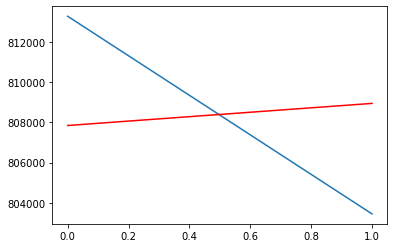

ARIMA(1, 2, 0) R2=-0.236
predicted=808578.510032, expected=813290.000000
predicted=807634.304691, expected=803440.000000
Test RMSE: 4460.400
Test R2:  0.17977105915103608


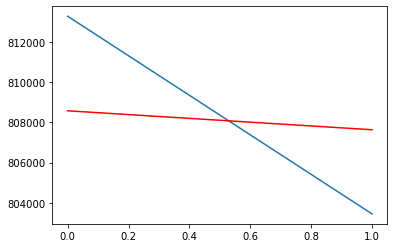

ARIMA(1, 2, 1) R2=0.180
predicted=807845.024926, expected=813290.000000
predicted=808948.328579, expected=803440.000000
Test RMSE: 5476.743
Test R2:  -0.23660882304290798


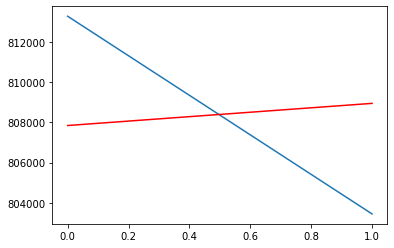

ARIMA(1, 2, 2) R2=-0.237
predicted=809560.669290, expected=813290.000000
predicted=811388.206514, expected=803440.000000
Test RMSE: 6208.136
Test R2:  -0.588948903753794


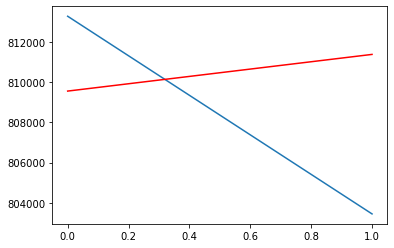

ARIMA(2, 0, 0) R2=-0.589
predicted=809351.474978, expected=813290.000000
predicted=811343.614714, expected=803440.000000
Test RMSE: 6244.161
Test R2:  -0.6074438012896031


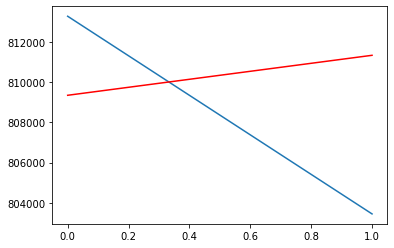

ARIMA(2, 0, 1) R2=-0.607
predicted=817977.419310, expected=813290.000000
predicted=813536.856062, expected=803440.000000
Test RMSE: 7871.417
Test R2:  -1.5544261845035483


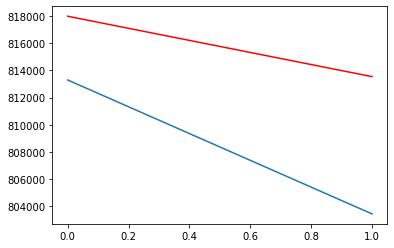

ARIMA(2, 1, 0) R2=-1.554
predicted=810510.967935, expected=813290.000000
predicted=807839.014158, expected=803440.000000
Test RMSE: 3679.290
Test R2:  0.44189552116769537


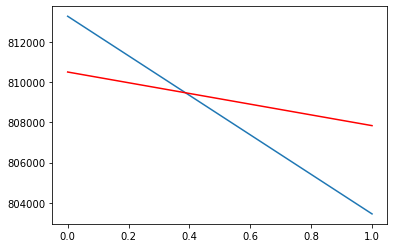

ARIMA(2, 1, 1) R2=0.442
predicted=809521.643507, expected=813290.000000
predicted=807845.533355, expected=813290.000000
predicted=808947.261833, expected=803440.000000
Test RMSE: 5475.954
Test R2:  -0.2362524656963514


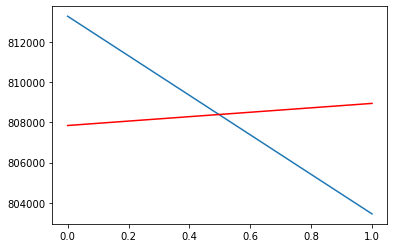

ARIMA(2, 2, 0) R2=-0.236
predicted=807849.999961, expected=813290.000000
predicted=808948.087902, expected=803440.000000
Test RMSE: 5474.150
Test R2:  -0.2354378671962578


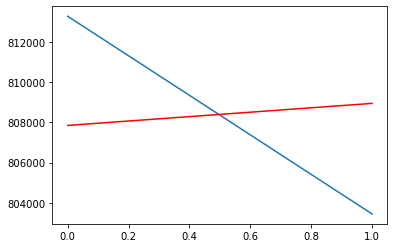

ARIMA(2, 2, 1) R2=-0.235
predicted=806000.972874, expected=813290.000000
predicted=809435.882041, expected=803440.000000
Test RMSE: 6673.849
Test R2:  -0.8362858422425177


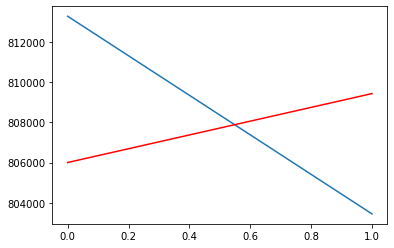

ARIMA(2, 2, 2) R2=-0.836
predicted=809407.226593, expected=813290.000000
predicted=811346.424063, expected=803440.000000
Test RMSE: 6228.462
Test R2:  -0.5993707437623028


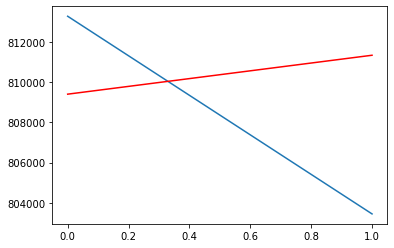

ARIMA(3, 0, 0) R2=-0.599
predicted=809346.337867, expected=813290.000000
predicted=810488.067606, expected=803440.000000
Test RMSE: 5710.855
Test R2:  -0.34458977426884685


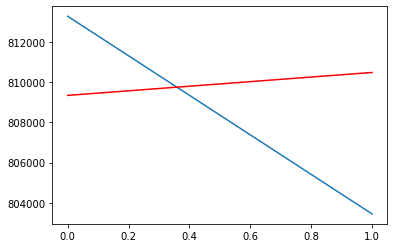

ARIMA(3, 0, 1) R2=-0.345
predicted=818278.925121, expected=813290.000000
predicted=813655.550912, expected=803440.000000
Test RMSE: 8038.870
Test R2:  -1.6642657039246243


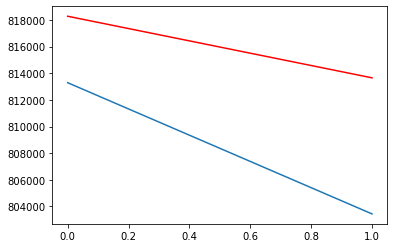

ARIMA(3, 1, 0) R2=-1.664
predicted=810562.221745, expected=813290.000000
predicted=808224.592655, expected=803440.000000
Test RMSE: 3894.426
Test R2:  0.37472024864435594


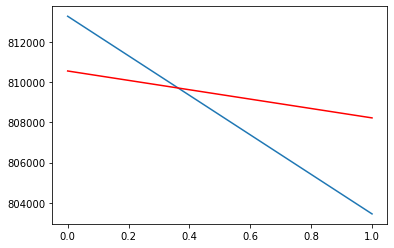

ARIMA(3, 1, 1) R2=0.375
predicted=811079.785747, expected=813290.000000
predicted=807124.809060, expected=813290.000000
predicted=808922.339979, expected=803440.000000
Test RMSE: 5833.765
Test R2:  -0.40308967042011323


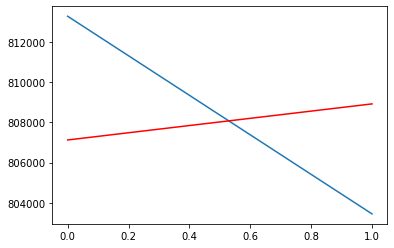

ARIMA(3, 2, 0) R2=-0.403
predicted=809139.373534, expected=813290.000000
predicted=808917.773408, expected=803440.000000
Test RMSE: 4859.717
Test R2:  0.02633505599422059


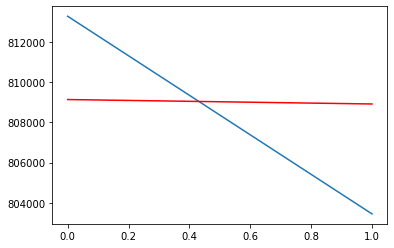

ARIMA(3, 2, 1) R2=0.026
predicted=808020.237860, expected=813290.000000
predicted=809484.198196, expected=803440.000000
Test RMSE: 5670.217
Test R2:  -0.325521966482226


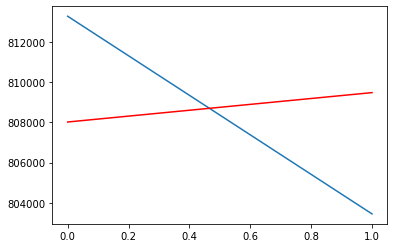

ARIMA(3, 2, 2) R2=-0.326
predicted=810360.638770, expected=813290.000000
predicted=810702.714027, expected=803440.000000
Test RMSE: 5537.516
Test R2:  -0.2642052055914208


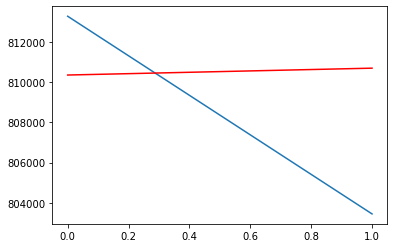

ARIMA(4, 0, 0) R2=-0.264
predicted=809395.826469, expected=813290.000000
predicted=967226.010563, expected=803440.000000
Test RMSE: 115846.929
Test R2:  -552.2948120312078


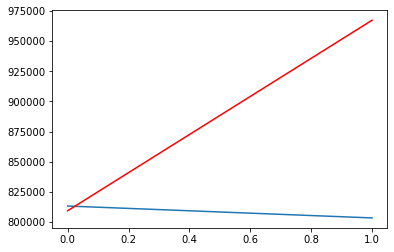

ARIMA(4, 0, 1) R2=-552.295
predicted=807343.102109, expected=813290.000000
predicted=807198.086044, expected=803440.000000
Test RMSE: 4974.375
Test R2:  -0.020151145942989945


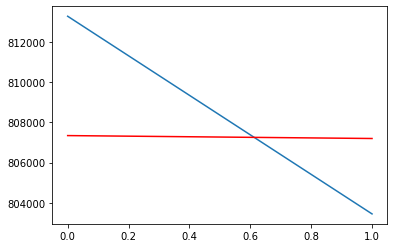

ARIMA(4, 1, 0) R2=-0.020
predicted=810123.466876, expected=813290.000000
predicted=810832.348756, expected=803440.000000
Test RMSE: 5686.552
Test R2:  -0.33317024052102595


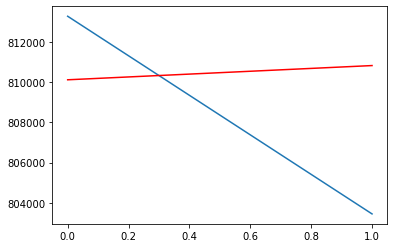

ARIMA(4, 1, 1) R2=-0.333
predicted=810534.644728, expected=813290.000000
predicted=807479.980958, expected=813290.000000
predicted=807519.121730, expected=813290.000000
predicted=808998.723084, expected=803440.000000
Test RMSE: 5665.794
Test R2:  -0.32345468284611645


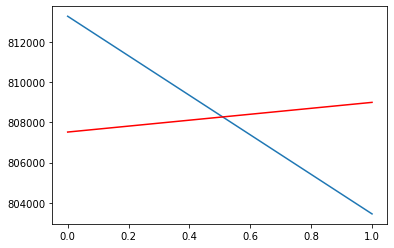

ARIMA(4, 2, 1) R2=-0.323
predicted=807836.219348, expected=813290.000000
predicted=809260.668590, expected=803440.000000
Test RMSE: 5640.209
Test R2:  -0.3115289518165423


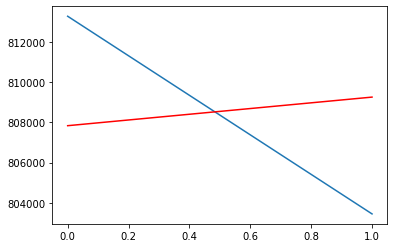

ARIMA(4, 2, 2) R2=-0.312
predicted=812882.493285, expected=813290.000000
predicted=816148.220367, expected=803440.000000
Test RMSE: 8990.688
Test R2:  -2.332524584967919


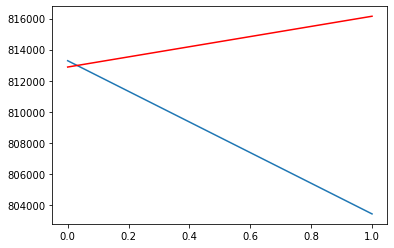

ARIMA(5, 0, 1) R2=-2.333
predicted=802880.784004, expected=813290.000000
predicted=814874.918242, expected=803440.000000
Test RMSE: 10934.101
Test R2:  -3.928942105392559


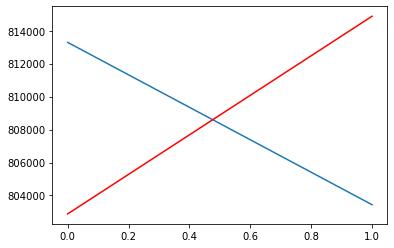

ARIMA(5, 1, 0) R2=-3.929
predicted=803010.923448, expected=813290.000000
predicted=815069.642008, expected=803440.000000
Test RMSE: 10975.153
Test R2:  -3.96602330271069


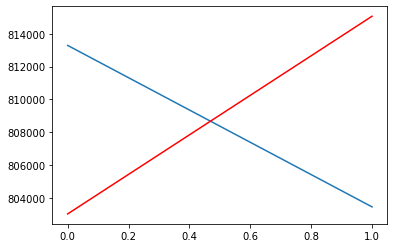

ARIMA(5, 1, 1) R2=-3.966
predicted=809254.220512, expected=813290.000000
predicted=807831.845023, expected=813290.000000
predicted=808930.000179, expected=803440.000000
Test RMSE: 5474.101
Test R2:  -0.23541570653104515


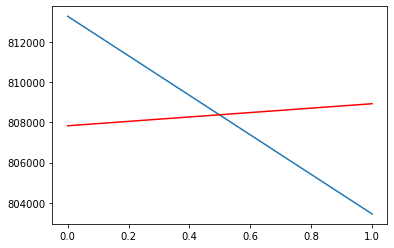

ARIMA(5, 2, 0) R2=-0.235
predicted=807832.808062, expected=813290.000000
predicted=810559.752682, expected=803440.000000
Test RMSE: 6343.178
Test R2:  -0.6588281156430926


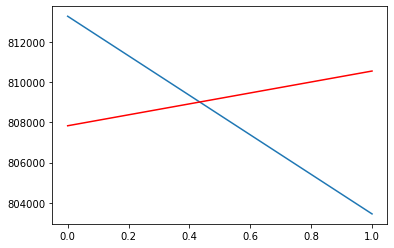

ARIMA(5, 2, 1) R2=-0.659
predicted=807833.733283, expected=813290.000000
predicted=808908.146383, expected=803440.000000
Test RMSE: 5462.210
Test R2:  -0.23005434438586048


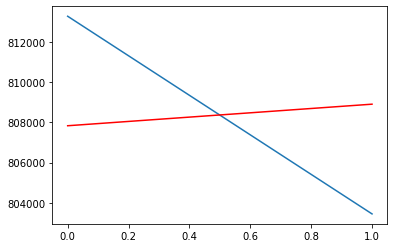

ARIMA(5, 2, 2) R2=-0.230
predicted=812633.838765, expected=813290.000000
predicted=816912.447853, expected=803440.000000
Test RMSE: 9537.751
Test R2:  -2.750416783984127


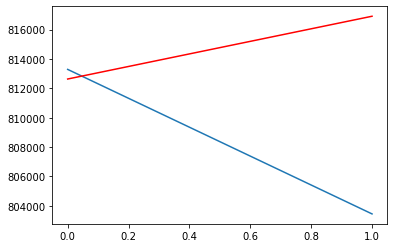

ARIMA(6, 0, 0) R2=-2.750
predicted=812564.756410, expected=813290.000000
predicted=817596.542391, expected=803440.000000
Test RMSE: 10023.315
Test R2:  -3.142001680644163


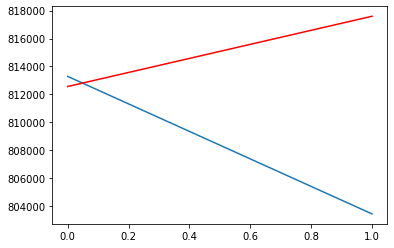

ARIMA(6, 0, 1) R2=-3.142
predicted=818704.002266, expected=813290.000000
predicted=814748.074058, expected=803440.000000
Test RMSE: 8865.212
Test R2:  -2.2401549311448727


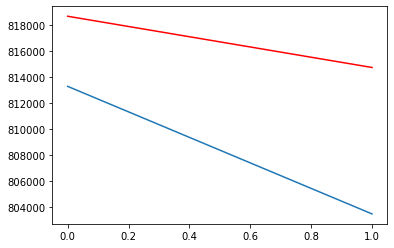

ARIMA(6, 1, 0) R2=-2.240
predicted=809330.422347, expected=813290.000000
predicted=815197.183537, expected=803440.000000
Test RMSE: 8772.389
Test R2:  -2.1726584301649106


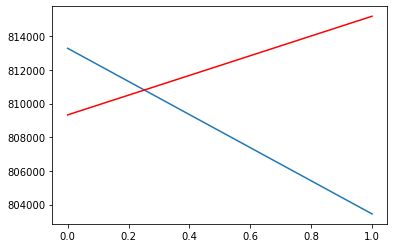

ARIMA(6, 1, 1) R2=-2.173
predicted=809600.666959, expected=813290.000000
predicted=807834.318635, expected=813290.000000
predicted=808921.817703, expected=803440.000000
Test RMSE: 5468.765
Test R2:  -0.23300856920646562


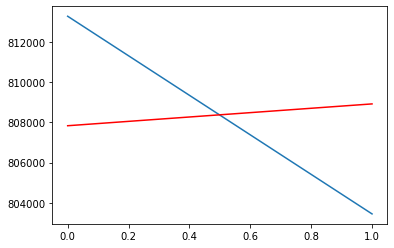

ARIMA(6, 2, 0) R2=-0.233
predicted=807832.177166, expected=813290.000000
predicted=807834.283752, expected=813290.000000
predicted=806513.156288, expected=803440.000000
Test RMSE: 4427.704
Test R2:  0.19175179016753752


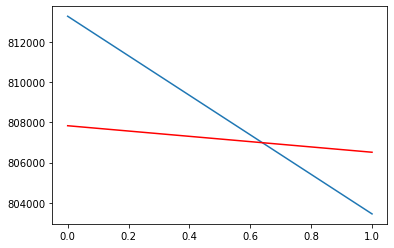

ARIMA(6, 2, 2) R2=0.192
predicted=823411.790856, expected=813290.000000
predicted=815892.759447, expected=803440.000000
Test RMSE: 11347.288
Test R2:  -4.308498103014465


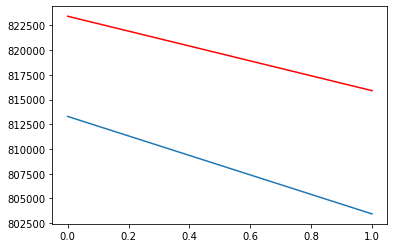

ARIMA(7, 0, 0) R2=-4.308
predicted=823408.488128, expected=813290.000000
predicted=823430.455229, expected=813290.000000
predicted=818915.361390, expected=813290.000000
predicted=814340.495685, expected=803440.000000
Test RMSE: 8673.681
Test R2:  -2.1016620503700825


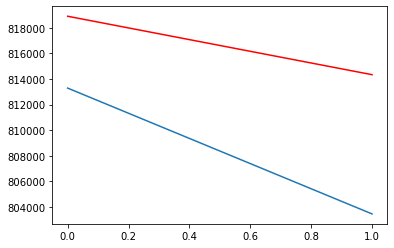

ARIMA(7, 1, 0) R2=-2.102
predicted=818851.065929, expected=813290.000000
predicted=811311.269199, expected=803440.000000
Test RMSE: 6814.776
Test R2:  -0.9146556088641671


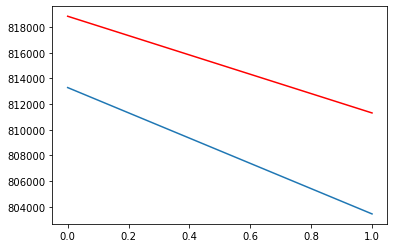

ARIMA(7, 1, 1) R2=-0.915
predicted=818775.627201, expected=813290.000000
predicted=809493.069710, expected=803440.000000
Test RMSE: 5776.321
Test R2:  -0.37559352621239017


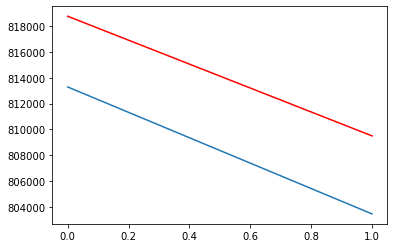

ARIMA(7, 1, 2) R2=-0.376
predicted=806496.927753, expected=813290.000000
predicted=808891.084074, expected=803440.000000
Test RMSE: 6158.740
Test R2:  -0.5637641014877552


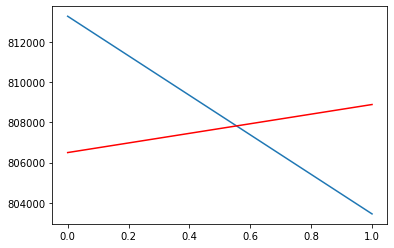

ARIMA(7, 2, 0) R2=-0.564
predicted=806623.660208, expected=813290.000000
predicted=808906.368292, expected=803440.000000
Test RMSE: 6095.952
Test R2:  -0.5320419817813513


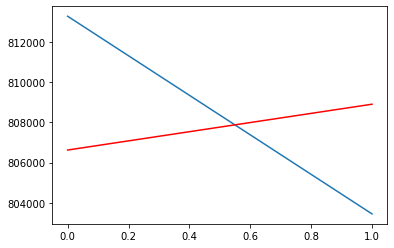

ARIMA(7, 2, 1) R2=-0.532
predicted=806964.723104, expected=813290.000000
predicted=808901.456438, expected=803440.000000
Test RMSE: 5909.172
Test R2:  -0.43959673517633324


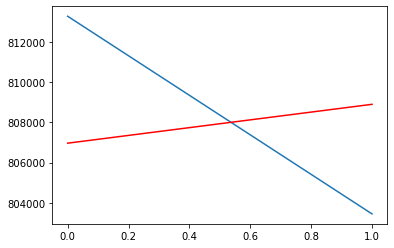

ARIMA(7, 2, 2) R2=-0.440
predicted=823411.850141, expected=813290.000000
predicted=819582.395830, expected=803440.000000
Test RMSE: 13472.728
Test R2:  -6.483394230834554


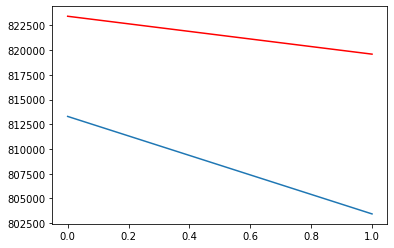

ARIMA(8, 0, 0) R2=-6.483
predicted=822634.003995, expected=813290.000000
predicted=819672.167244, expected=803440.000000
Test RMSE: 13243.747
Test R2:  -6.231182015763185


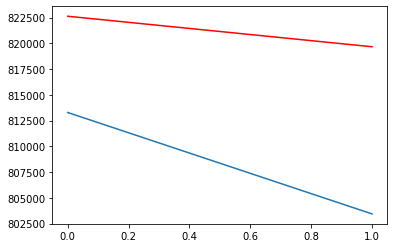

ARIMA(8, 0, 1) R2=-6.231
predicted=821961.319750, expected=813290.000000
predicted=819582.248880, expected=803440.000000
Test RMSE: 12956.928
Test R2:  -5.92136357998319


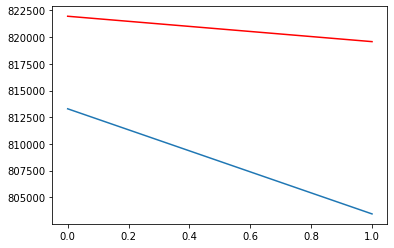

ARIMA(8, 0, 2) R2=-5.921
predicted=818915.362070, expected=813290.000000
predicted=814441.311075, expected=803440.000000
Test RMSE: 8737.092
Test R2:  -2.1471782334447265


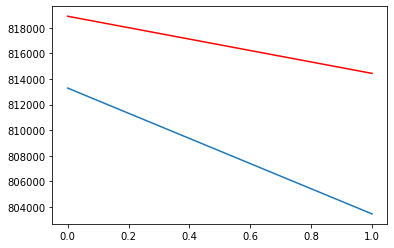

ARIMA(8, 1, 0) R2=-2.147
predicted=818878.825372, expected=813290.000000
predicted=814411.286278, expected=803440.000000
Test RMSE: 8706.437
Test R2:  -2.1251327866045706


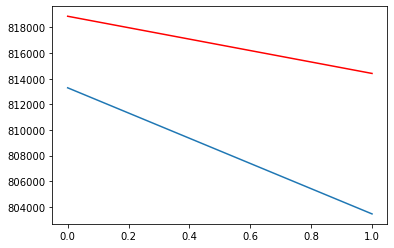

ARIMA(8, 1, 1) R2=-2.125
predicted=818831.393905, expected=813290.000000
predicted=814319.072356, expected=803440.000000
Test RMSE: 8633.112
Test R2:  -2.0727154606128027


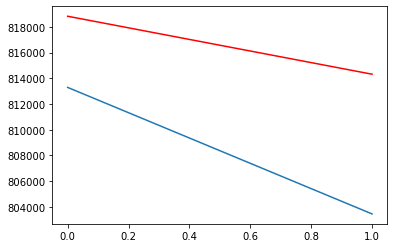

ARIMA(8, 1, 2) R2=-2.073
predicted=806496.929529, expected=813290.000000
predicted=803033.029161, expected=803440.000000
Test RMSE: 4812.039
Test R2:  0.04534652067393452


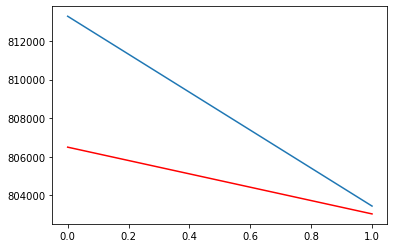

ARIMA(8, 2, 0) R2=0.045
predicted=806624.562647, expected=813290.000000
predicted=803239.837809, expected=803440.000000
Test RMSE: 4715.301
Test R2:  0.0833441348801226


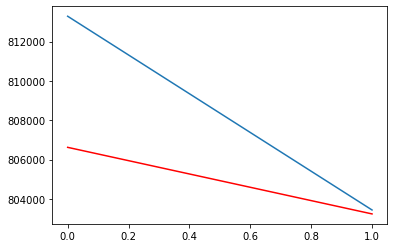

ARIMA(8, 2, 1) R2=0.083
predicted=806964.069231, expected=813290.000000
predicted=803650.647925, expected=803440.000000
Test RMSE: 4475.588
Test R2:  0.17417559247267156


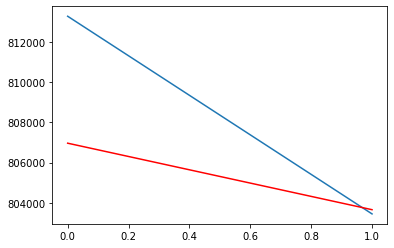

ARIMA(8, 2, 2) R2=0.174
Best ARIMA(1, 1, 1) R2=0.447


In [23]:
p_values = [0, 1, 2, 3, 4, 5, 6, 7, 8]
d_values = range(0, 3)
q_values = range(0, 3)
import warnings
warnings.filterwarnings("ignore")
evaluate_models(data["00 - 19"], p_values, d_values, q_values)

After the grid search, the best hyperparameters turn out to be (1,1,1). Our previous 0.447 R2 was already the best performance we could attain and no further tuning was required.
Given that autoregression performed better with or without applying differencing, we will go with AR as the model we will use for this time series forecasting.

## EXPLORING THE DATA – others

Male Percentage


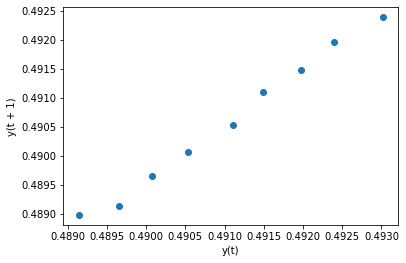

          t-1       t+1
t-1  1.000000  0.995922
t+1  0.995922  1.000000


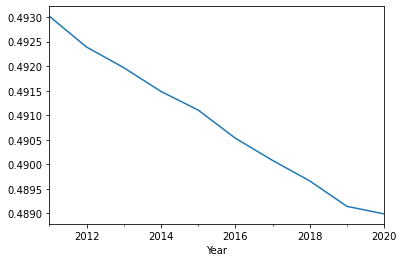

ADF Statistic: -1.572159
p-value: 0.497562
Critical Values:
	1%: -4.665
	5%: -3.367
	10%: -2.803

 testing log transform...
ADF Statistic: -1.532548
p-value: 0.517353
Critical Values:
	1%: -4.665
	5%: -3.367
	10%: -2.803

 testing log transform+differencing...
ADF Statistic: -3.076956
p-value: 0.028306
Critical Values:
	1%: -4.665
	5%: -3.367
	10%: -2.803


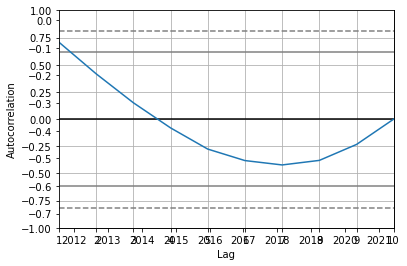

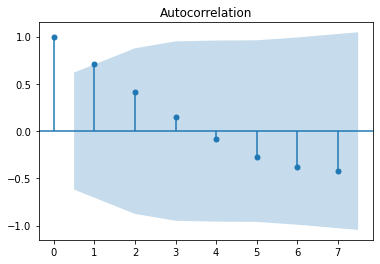

20 - 39


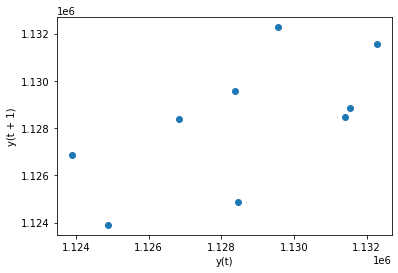

          t-1       t+1
t-1  1.000000  0.626937
t+1  0.626937  1.000000


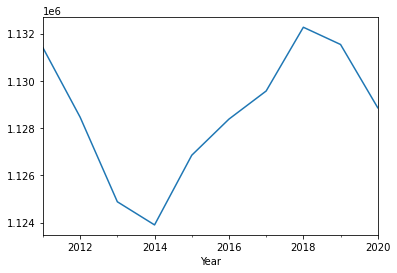

ADF Statistic: -23.112287
p-value: 0.000000
Critical Values:
	1%: -5.354
	5%: -3.646
	10%: -2.901

 testing log transform...
ADF Statistic: -22.559468
p-value: 0.000000
Critical Values:
	1%: -5.354
	5%: -3.646
	10%: -2.901

 testing log transform+differencing...
ADF Statistic: -2.401757
p-value: 0.141241
Critical Values:
	1%: -4.939
	5%: -3.478
	10%: -2.844


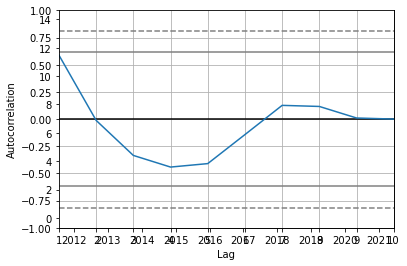

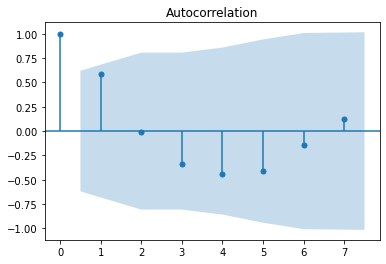

40 - 59


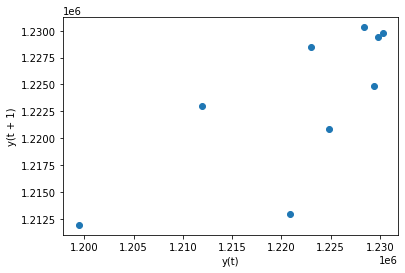

          t-1       t+1
t-1  1.000000  0.734888
t+1  0.734888  1.000000


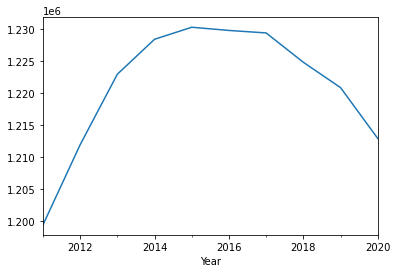

ADF Statistic: 0.379767
p-value: 0.980722
Critical Values:
	1%: -4.939
	5%: -3.478
	10%: -2.844

 testing log transform...
ADF Statistic: 0.428534
p-value: 0.982531
Critical Values:
	1%: -4.939
	5%: -3.478
	10%: -2.844

 testing log transform+differencing...
ADF Statistic: -2.658660
p-value: 0.081469
Critical Values:
	1%: -4.939
	5%: -3.478
	10%: -2.844


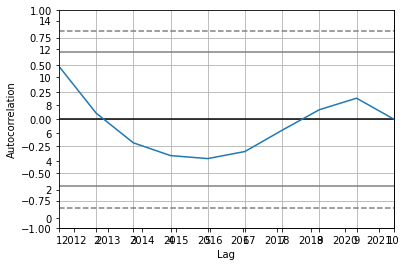

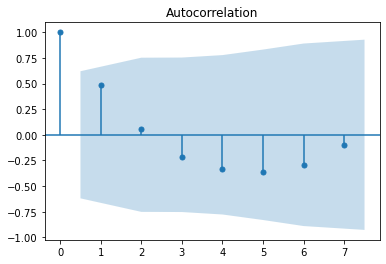

60 & Over


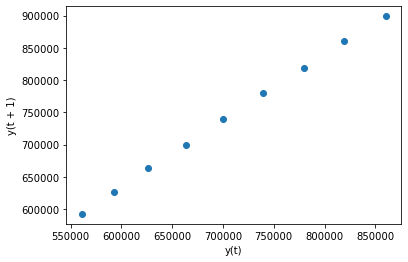

          t-1       t+1
t-1  1.000000  0.999881
t+1  0.999881  1.000000


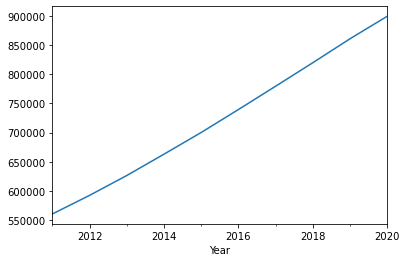

ADF Statistic: -3.571887
p-value: 0.006322
Critical Values:
	1%: -5.354
	5%: -3.646
	10%: -2.901

 testing log transform...
ADF Statistic: -0.927974
p-value: 0.778621
Critical Values:
	1%: -5.354
	5%: -3.646
	10%: -2.901

 testing log transform+differencing...
ADF Statistic: 3.764642
p-value: 1.000000
Critical Values:
	1%: -5.354
	5%: -3.646
	10%: -2.901


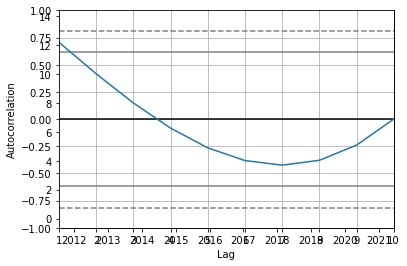

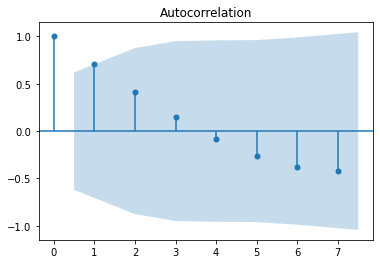

Average Income


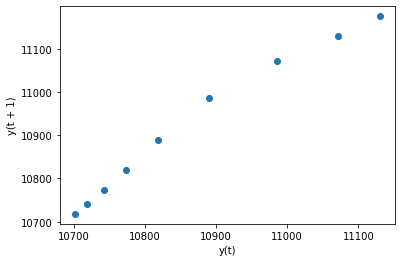

         t-1      t+1
t-1  1.00000  0.99048
t+1  0.99048  1.00000


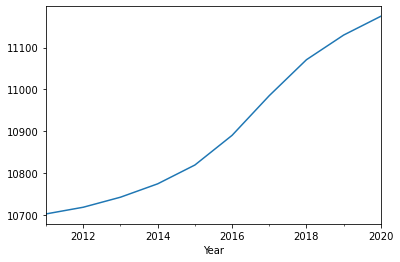

ADF Statistic: -15.812494
p-value: 0.000000
Critical Values:
	1%: -5.354
	5%: -3.646
	10%: -2.901

 testing log transform...
ADF Statistic: -14.237074
p-value: 0.000000
Critical Values:
	1%: -5.354
	5%: -3.646
	10%: -2.901

 testing log transform+differencing...
ADF Statistic: -1.507787
p-value: 0.529656
Critical Values:
	1%: -5.354
	5%: -3.646
	10%: -2.901


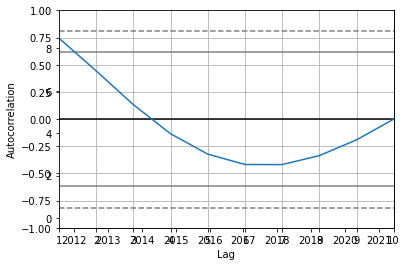

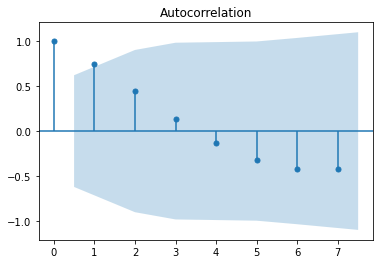

In [25]:
list = ['Male Percentage', '20 - 39', '40 - 59', '60 & Over', 'Average Income']
for i in list:
    print(i)
    
    lag_plot(X_total_grouped[i])
    pyplot.show()

    values = DataFrame(X_total_grouped[i].values)
    dataframe = concat([values.shift(1), values], axis=1)
    dataframe.columns = ['t-1', 't+1']
    result = dataframe.corr()
    print(result)
    
    X_total_grouped[i].plot()
    pyplot.show()
    
    series = X_total_grouped[i]
    X = series.values
    result = adfuller(X)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    
    print("\n testing log transform...")
    # log transform
    df_log = np.log(data[i])
    ADFtest(df_log)
    
    print("\n testing log transform+differencing...")
    # log transform and subtract the previous value when time shifting
    df_log_shift = df_log - df_log.shift()
    df_log_shift.dropna(inplace=True)
    ADFtest(df_log_shift)
    
    
    autocorrelation_plot(X_total_grouped[i])
    pyplot.show()

    plot_acf(X_total_grouped[i], lags=7)
    pyplot.show()


By doing the same analysis, we get that:


    Male Percentage = log transform+differencing

    20 - 39 = remain

    40 - 59 = log transform+differencing

    60 & Over = remain

    Avg Income = remain

## Model fitting to forecast data

We would now like to fit models for each subzone to forecast its data in the future.

### Obtain list of subzones in final regression and filter data table down to those

In [26]:
BusMRTGeoData = pd.read_csv('BusMRTGeoData.csv')
BusMRTGeoData

SUBZONE_N  AVG_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK  \
0          ALJUNIED                                477236.0   
1        ANAK BUKIT                                147583.0   
2        ANCHORVALE                                122622.0   
3       BEDOK NORTH                                700065.0   
4   BEDOK RESERVOIR                                155476.0   
..              ...                                     ...   
81   WOODLANDS EAST                                572727.0   
82   WOODLANDS WEST                                254941.0   
83          YEW TEE                                302951.0   
84     YIO CHU KANG                                288341.0   
85      YISHUN WEST                                570335.0   

    AVG_TAP_IN_TAP_OUT_VOLUME_PEAK  AVG_TAP_IN_TAP_OUT_VOLUME_WEEKDAY  \
0                        2649777.0                          2670371.0   
1                         818550.0                           849757.0   
2                         674735.0                           811713.0   
3                        3896305.0                          4425740.0   
4                         854617.0                           878224.0   
..                             ...                                ...   
81                       3126930.0                          3289376.0   
82                       1409087.0                          1579596.0   
83                       1653555.0                          1746928.0   
84                       1520813.0                          1365389.0   
85                       3148707.0                          3384750.0   

    AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY  PEAK_HOUR_PERCENTAGE  \
0                         15454280.0              0.171459   
1                          4909818.0              0.166717   
2                          4596871.0              0.146781   
3                         25472206.0              0.152963   
4                          5012083.0              0.170511   
..                               ...                   ...   
81                        18614145.0              0.167987   
82                         8975706.0              0.156989   
83                         9926964.0              0.166572   
84                         7430472.0              0.204672   
85                        19424600.0              0.162099   

    WEEKDAY_PERCENTAGE  ('2020', 'Male Percentage')  ('2020', '00 - 19')  \
0             0.863958                     0.493623                 6150   
1             0.865365                     0.474166                 4280   
2             0.882897                     0.492519                13550   
3             0.868739                     0.485093                13230   
4             0.876107                     0.489988                 5280   
..                 ...                          ...                  ...   
81            0.883569                     0.499949                23130   
82            0.879929                     0.508994                 6220   
83            0.879890                     0.497771                 8460   
84            0.918777                          NaN                    0   
85            0.871253                     0.495641                 9000   

    ('2020', '20 - 39')  ('2020', '40 - 59')  ('2020', '60 & Over')  \
0                 10720                12170                  10940   
1                  5660                 6190                   5750   
2                 14460                13710                   6410   
3                 20760                24610                  23260   
4                  6820                 7960                   5420   
..                  ...                  ...                    ...   
81                30470                31480                  13910   
82                10300                 9840                   7560   
83                11480                13730                   6730   
84      

In [27]:
listofSubzones = BusMRTGeoData["SUBZONE_N"]
listofSubzones

0            ALJUNIED
1          ANAK BUKIT
2          ANCHORVALE
3         BEDOK NORTH
4     BEDOK RESERVOIR
           ...       
81     WOODLANDS EAST
82     WOODLANDS WEST
83            YEW TEE
84       YIO CHU KANG
85        YISHUN WEST
Name: SUBZONE_N, Length: 86, dtype: object

In [28]:
SubzonesData = dT_data1_hierarchical_pivoted.loc[dT_data1_hierarchical_pivoted["SUBZONE_N"].isin(listofSubzones)]
SubzonesData = SubzonesData[["SUBZONE_N", "Male Percentage", "00 - 19", "20 - 39", "40 - 59", "60 & Over", "Average Income", "Year"]]
SubzonesData = SubzonesData.sort_values(by=["SUBZONE_N", "Year"], ascending=True)
pd.set_option('display.max_rows', None)
SubzonesData.head(100)

SUBZONE_N  Male Percentage  00 - 19  20 - 39  40 - 59  60 & Over  \
1009         ALJUNIED         0.497527     8390    12520    13460       8090   
1008         ALJUNIED         0.496174     8070    12070    13350       8320   
1007         ALJUNIED         0.497406     8090    11810    13750       8750   
1006         ALJUNIED         0.496120     8010    11720    13800       8990   
1005         ALJUNIED         0.498202     7460    11420    13530       9320   
1004         ALJUNIED         0.497686     7030    11050    13240       9730   
1003         ALJUNIED         0.497000     6570    10650    12810       9970   
1002         ALJUNIED         0.497874     6400    10670    12630      10270   
1001         ALJUNIED         0.496014     6340    10750    12420      10650   
1000         ALJUNIED         0.493623     6150    10720    12170      10940   
609        ANAK BUKIT         0.479745     5370     5840     7140       3620   
608        ANAK BUKIT         0.478241     5320     5930     7230       3810   
607        ANAK BUKIT         0.478495     5140     5910     7210       4060   
606        ANAK BUKIT         0.478475     4970     5870     7140       4300   
605        ANAK BUKIT         0.478854     4710     5810     6960       4510   
604        ANAK BUKIT         0.476364     4570     5770     6850       4800   
603        ANAK BUKIT         0.476559     4420     5820     6670       5070   
602        ANAK BUKIT         0.476686     4390     5840     6550       5330   
601        ANAK BUKIT         0.474134     4390     5800     6470       5560   
600        ANAK BUKIT         0.474166     4280     5660     6190       5750   
2439       ANCHORVALE         0.494205     8860    11350     8190       2660   
2438       ANCHORVALE         0.493736     8900    10800     8600       2850   
2437       ANCHORVALE         0.492283     8850    10160     9080       3030   
2436       ANCHORVALE         0.492119     8920     9820     9600       3400   
2435       ANCHORVALE         0.491062    10520    12700    10830       4000   
2434       ANCHORVALE         0.489791    10970    12670    11160       4390   
2433       ANCHORVALE         0.491491    11110    12300    11300       4670   
2432       ANCHORVALE         0.492227    12540    13740    12290       5190   
2431       ANCHORVALE         0.493018    13340    14410    13090       5720   
2430       ANCHORVALE         0.492519    13550    14460    13710       6410   
139       BEDOK NORTH         0.492565    19190    26470    28660      16490   
138       BEDOK NORTH         0.491998    18470    25820    28410      17300   
137       BEDOK NORTH         0.490312    17830    25190    28200      18100   
136       BEDOK NORTH         0.489743    17130    24640    27630      18850   
135       BEDOK NORTH         0.488654    16060    23400    27000      19480   
134       BEDOK NORTH         0.488152    15230    22440    26540      20210   
133       BEDOK NORTH         0.486996    14770    21860    26240      20950   
132       BEDOK NORTH         0.487170    14060    21290    25630      21650   
131       BEDOK NORTH         0.486005    13740    21060    25220      22500   
130       BEDOK NORTH         0.485093    13230    20760    24610      23260   
149   BEDOK RESERVOIR         0.494783     5440     6990     7420       3150   
148   BEDOK RESERVOIR         0.491949     5580     7010     7630       3410   
147   BEDOK RESERVOIR         0.490107     5660     7110     7800       3680   
146   BEDOK RESERVOIR         0.489729     5640     6970     7790       3950   
145   BEDOK RESERVOIR         0.488976     5740     7340     8030       4290   
144   BEDOK RESERVOIR         0.488479     5790     7440     8270       4550   
143   BEDOK RESERVOIR         0.488736     5800     7300     8330       4760   
142   BEDOK RESERVOIR         0.488192     5550     7110     8180       5010   
141   BEDOK RESERVOIR         0.487910     5410     6950     8050       5250   
140   BEDOK 

### Creating prediction dataset for eventual export

In [58]:
predicted_subzone_data = pd.DataFrame( columns = ['Male Percentage', '00 - 19', '20 - 39', '40 - 59', '60 & Over', 'Average Income'])
#predicted_subzone_data.insert(0, "SUBZONE_N", listofSubzones, True)
predicted_subzone_data

Empty DataFrame
Columns: [Male Percentage, 00 - 19, 20 - 39, 40 - 59, 60 & Over, Average Income]
Index: []

### Getting the predictions

##### Get the data

In [59]:
data0 = SubzonesData[0:10]
data0.set_index('Year', inplace=True)
data0

SUBZONE_N  Male Percentage  00 - 19  20 - 39  40 - 59  60 & Over  \
Year                                                                          
2011-12-31  ALJUNIED         0.497527     8390    12520    13460       8090   
2012-12-31  ALJUNIED         0.496174     8070    12070    13350       8320   
2013-12-31  ALJUNIED         0.497406     8090    11810    13750       8750   
2014-12-31  ALJUNIED         0.496120     8010    11720    13800       8990   
2015-12-31  ALJUNIED         0.498202     7460    11420    13530       9320   
2016-12-31  ALJUNIED         0.497686     7030    11050    13240       9730   
2017-12-31  ALJUNIED         0.497000     6570    10650    12810       9970   
2018-12-31  ALJUNIED         0.497874     6400    10670    12630      10270   
2019-12-31  ALJUNIED         0.496014     6340    10750    12420      10650   
2020-12-31  ALJUNIED         0.493623     6150    10720    12170      10940   

            Average Income  
Year                        
2011-12-31    10493.365310  
2012-12-31    10494.256272  
2013-12-31    10432.653518  
2014-12-31    10588.383123  
2015-12-31    10767.615442  
2016-12-31    10874.354952  
2017-12-31    10984.718372  
2018-12-31    11291.631008  
2019-12-31    11581.573779  
2020-12-31    11730.102220

##### Do the differencing for the selected variables (determined from earlier exploration)

In [60]:
data = data0.copy()

data["00 - 19"] = np.log(data["00 - 19"])

list = ['Male Percentage', '40 - 59']
for i in list:
    # log transform
    df_log = np.log(data[i])
    # log transform and subtract the previous value when time shifting
    df_log_shift = df_log - df_log.shift()
    df_log_shift.dropna(inplace=True)
    data[str(i)] = df_log_shift
    #data = data.replace(np.nan,0)
data


SUBZONE_N  Male Percentage   00 - 19  20 - 39   40 - 59  60 & Over  \
Year                                                                            
2011-12-31  ALJUNIED              NaN  9.034796    12520       NaN       8090   
2012-12-31  ALJUNIED        -0.002722  8.995909    12070 -0.008206       8320   
2013-12-31  ALJUNIED         0.002479  8.998384    11810  0.029522       8750   
2014-12-31  ALJUNIED        -0.002587  8.988446    11720  0.003630       8990   
2015-12-31  ALJUNIED         0.004187  8.917311    11420 -0.019759       9320   
2016-12-31  ALJUNIED        -0.001037  8.857942    11050 -0.021667       9730   
2017-12-31  ALJUNIED        -0.001379  8.790269    10650 -0.033016       9970   
2018-12-31  ALJUNIED         0.001758  8.764053    10670 -0.014151      10270   
2019-12-31  ALJUNIED        -0.003744  8.754634    10750 -0.016767      10650   
2020-12-31  ALJUNIED        -0.004831  8.724207    10720 -0.020334      10940   

            Average Income  
Year                        
2011-12-31    10493.365310  
2012-12-31    10494.256272  
2013-12-31    10432.653518  
2014-12-31    10588.383123  
2015-12-31    10767.615442  
2016-12-31    10874.354952  
2017-12-31    10984.718372  
2018-12-31    11291.631008  
2019-12-31    11581.573779  
2020-12-31    11730.102220

##### Predict the values

In [61]:
prediction_df = pd.DataFrame()
list2 = ['Average Income','60 & Over','40 - 59','20 - 39', '00 - 19', 'Male Percentage' ]
for var in list2:
    if var == "Male Percentage" or "40 - 59":
        model = AutoReg(data[var][1:], lags = 1)
        #print(data[var][1:])
    else:
        model = AutoReg(data[var], lags = 1)
        #print(data[var])

    model_fit = model.fit()
    predictions = model_fit.predict(start=9, end=14, dynamic=False)
    prediction_df.insert(0, var, predictions, True)
prediction_df

Male Percentage   00 - 19       20 - 39   40 - 59     60 & Over  \
2021-12-31         0.000909  8.692589  10651.704133 -0.015768  11232.705788   
2022-12-31        -0.001094  8.661437  10595.939047 -0.013903  11518.339030   
2023-12-31        -0.000395  8.630744  10550.405619 -0.013141  11797.070616   
2024-12-31        -0.000639  8.600502  10513.226568 -0.012830  12069.067310   
2025-12-31        -0.000554  8.570706  10482.869050 -0.012702  12334.491843   
2026-12-31        -0.000584  8.541350  10458.081465 -0.012651  12593.503017   

            Average Income  
2021-12-31    11997.975139  
2022-12-31    12301.448802  
2023-12-31    12645.254604  
2024-12-31    13034.752751  
2025-12-31    13476.015830  
2026-12-31    13975.923484

##### Append the predicted values to the data

In [62]:
datapred = data.append(prediction_df)
datapred

SUBZONE_N  Male Percentage   00 - 19       20 - 39  \
2011-12-31           ALJUNIED              NaN  9.034796  12520.000000   
2012-12-31           ALJUNIED        -0.002722  8.995909  12070.000000   
2013-12-31           ALJUNIED         0.002479  8.998384  11810.000000   
2014-12-31           ALJUNIED        -0.002587  8.988446  11720.000000   
2015-12-31           ALJUNIED         0.004187  8.917311  11420.000000   
2016-12-31           ALJUNIED        -0.001037  8.857942  11050.000000   
2017-12-31           ALJUNIED        -0.001379  8.790269  10650.000000   
2018-12-31           ALJUNIED         0.001758  8.764053  10670.000000   
2019-12-31           ALJUNIED        -0.003744  8.754634  10750.000000   
2020-12-31           ALJUNIED        -0.004831  8.724207  10720.000000   
2021-12-31 00:00:00       NaN         0.000909  8.692589  10651.704133   
2022-12-31 00:00:00       NaN        -0.001094  8.661437  10595.939047   
2023-12-31 00:00:00       NaN        -0.000395  8.630744  10550.405619   
2024-12-31 00:00:00       NaN        -0.000639  8.600502  10513.226568   
2025-12-31 00:00:00       NaN        -0.000554  8.570706  10482.869050   
2026-12-31 00:00:00       NaN        -0.000584  8.541350  10458.081465   

                      40 - 59     60 & Over  Average Income  
2011-12-31                NaN   8090.000000    10493.365310  
2012-12-31          -0.008206   8320.000000    10494.256272  
2013-12-31           0.029522   8750.000000    10432.653518  
2014-12-31           0.003630   8990.000000    10588.383123  
2015-12-31          -0.019759   9320.000000    10767.615442  
2016-12-31          -0.021667   9730.000000    10874.354952  
2017-12-31          -0.033016   9970.000000    10984.718372  
2018-12-31          -0.014151  10270.000000    11291.631008  
2019-12-31          -0.016767  10650.000000    11581.573779  
2020-12-31          -0.020334  10940.000000    11730.102220  
2021-12-31 00:00:00 -0.015768  11232.705788    11997.975139  
2022-12-31 00:00:00 -0.013903  11518.339030    12301.448802  
2023-12-31 00:00:00 -0.013141  11797.070616    12645.254604  
2024-12-31 00:00:00 -0.012830  12069.067310    13034.752751  
2025-12-31 00:00:00 -0.012702  12334.491843    13476.015830  
2026-12-31 00:00:00 -0.012651  12593.503017    13975.923484

##### Undo the differencing part #1 - the log for 00-19

In [63]:
datapred["00 - 19"] = np.exp(datapred["00 - 19"])
datapred

SUBZONE_N  Male Percentage      00 - 19       20 - 39  \
2011-12-31           ALJUNIED              NaN  8390.000000  12520.000000   
2012-12-31           ALJUNIED        -0.002722  8070.000000  12070.000000   
2013-12-31           ALJUNIED         0.002479  8090.000000  11810.000000   
2014-12-31           ALJUNIED        -0.002587  8010.000000  11720.000000   
2015-12-31           ALJUNIED         0.004187  7460.000000  11420.000000   
2016-12-31           ALJUNIED        -0.001037  7030.000000  11050.000000   
2017-12-31           ALJUNIED        -0.001379  6570.000000  10650.000000   
2018-12-31           ALJUNIED         0.001758  6400.000000  10670.000000   
2019-12-31           ALJUNIED        -0.003744  6340.000000  10750.000000   
2020-12-31           ALJUNIED        -0.004831  6150.000000  10720.000000   
2021-12-31 00:00:00       NaN         0.000909  5958.590742  10651.704133   
2022-12-31 00:00:00       NaN        -0.001094  5775.828350  10595.939047   
2023-12-31 00:00:00       NaN        -0.000395  5601.241498  10550.405619   
2024-12-31 00:00:00       NaN        -0.000639  5434.388475  10513.226568   
2025-12-31 00:00:00       NaN        -0.000554  5274.855098  10482.869050   
2026-12-31 00:00:00       NaN        -0.000584  5122.252793  10458.081465   

                      40 - 59     60 & Over  Average Income  
2011-12-31                NaN   8090.000000    10493.365310  
2012-12-31          -0.008206   8320.000000    10494.256272  
2013-12-31           0.029522   8750.000000    10432.653518  
2014-12-31           0.003630   8990.000000    10588.383123  
2015-12-31          -0.019759   9320.000000    10767.615442  
2016-12-31          -0.021667   9730.000000    10874.354952  
2017-12-31          -0.033016   9970.000000    10984.718372  
2018-12-31          -0.014151  10270.000000    11291.631008  
2019-12-31          -0.016767  10650.000000    11581.573779  
2020-12-31          -0.020334  10940.000000    11730.102220  
2021-12-31 00:00:00 -0.015768  11232.705788    11997.975139  
2022-12-31 00:00:00 -0.013903  11518.339030    12301.448802  
2023-12-31 00:00:00 -0.013141  11797.070616    12645.254604  
2024-12-31 00:00:00 -0.012830  12069.067310    13034.752751  
2025-12-31 00:00:00 -0.012702  12334.491843    13476.015830  
2026-12-31 00:00:00 -0.012651  12593.503017    13975.923484

#### Undo the differencing part #2 - the log + differencing for Male and 40-59

In [64]:
# restore first value
datapred["Male Percentage"] = datapred["Male Percentage"].replace(np.nan, np.log(data0["Male Percentage"][0]))
datapred["40 - 59"] = datapred["40 - 59"].replace(np.nan, np.log(data0["40 - 59"][0]))

# undo the differencing (cumulative summing)
datapred["Male Percentage"] = datapred["Male Percentage"].cumsum()
datapred["40 - 59"] = datapred["40 - 59"].cumsum()

# undo the log (exp)
datapred["Male Percentage"] = np.exp(datapred["Male Percentage"])
datapred["40 - 59"] = np.exp(datapred["40 - 59"])

#fill in the subzone name
datapred["SUBZONE_N"] = datapred["SUBZONE_N"].replace(np.nan, listofSubzones[0])

datapred

SUBZONE_N  Male Percentage      00 - 19       20 - 39  \
2011-12-31           ALJUNIED         0.497527  8390.000000  12520.000000   
2012-12-31           ALJUNIED         0.496174  8070.000000  12070.000000   
2013-12-31           ALJUNIED         0.497406  8090.000000  11810.000000   
2014-12-31           ALJUNIED         0.496120  8010.000000  11720.000000   
2015-12-31           ALJUNIED         0.498202  7460.000000  11420.000000   
2016-12-31           ALJUNIED         0.497686  7030.000000  11050.000000   
2017-12-31           ALJUNIED         0.497000  6570.000000  10650.000000   
2018-12-31           ALJUNIED         0.497874  6400.000000  10670.000000   
2019-12-31           ALJUNIED         0.496014  6340.000000  10750.000000   
2020-12-31           ALJUNIED         0.493623  6150.000000  10720.000000   
2021-12-31 00:00:00  ALJUNIED         0.494072  5958.590742  10651.704133   
2022-12-31 00:00:00  ALJUNIED         0.493532  5775.828350  10595.939047   
2023-12-31 00:00:00  ALJUNIED         0.493337  5601.241498  10550.405619   
2024-12-31 00:00:00  ALJUNIED         0.493022  5434.388475  10513.226568   
2025-12-31 00:00:00  ALJUNIED         0.492749  5274.855098  10482.869050   
2026-12-31 00:00:00  ALJUNIED         0.492461  5122.252793  10458.081465   

                          40 - 59     60 & Over  Average Income  
2011-12-31           13460.000000   8090.000000    10493.365310  
2012-12-31           13350.000000   8320.000000    10494.256272  
2013-12-31           13750.000000   8750.000000    10432.653518  
2014-12-31           13800.000000   8990.000000    10588.383123  
2015-12-31           13530.000000   9320.000000    10767.615442  
2016-12-31           13240.000000   9730.000000    10874.354952  
2017-12-31           12810.000000   9970.000000    10984.718372  
2018-12-31           12630.000000  10270.000000    11291.631008  
2019-12-31           12420.000000  10650.000000    11581.573779  
2020-12-31           12170.000000  10940.000000    11730.102220  
2021-12-31 00:00:00  11979.609402  11232.705788    11997.975139  
2022-12-31 00:00:00  11814.212700  11518.339030    12301.448802  
2023-12-31 00:00:00  11659.979802  11797.070616    12645.254604  
2024-12-31 00:00:00  11511.342330  12069.067310    13034.752751  
2025-12-31 00:00:00  11366.044439  12334.491843    13476.015830  
2026-12-31 00:00:00  11223.163288  12593.503017    13975.923484

In [65]:
predicted_subzone_data = predicted_subzone_data.append(datapred.tail(1))

### Okay, now repeat all of the above for the rest of the subzones. We add an additional check for the demographics != 0 (e.g. Changi Airport where no one lives)

In [66]:
for subzone in range(len(listofSubzones)):
    if subzone==0: continue
    #print(subzone)
#subzone=6

    data0 = SubzonesData[10*subzone:10*subzone+10]
    data0.set_index('Year', inplace=True)

    if not (data0["Male Percentage"].min() == 0):

        data = data0.copy()
        data["00 - 19"] = np.log(data["00 - 19"])

        list = ['Male Percentage', '40 - 59']
        for i in list:
            # log transform
            df_log = np.log(data[i])
            # log transform and subtract the previous value when time shifting
            df_log_shift = df_log - df_log.shift()
            df_log_shift.dropna(inplace=True)
            data[str(i)] = df_log_shift
            #data = data.replace(np.nan,0)

        prediction_df = pd.DataFrame()
        list2 = ['Average Income','60 & Over','40 - 59','20 - 39', '00 - 19', 'Male Percentage' ]
        for var in list2:
            if var == "Male Percentage" or "40 - 59":
                model = AutoReg(data[var][1:], lags = 1)
                #print(data[var][1:])
            else:
                model = AutoReg(data[var], lags = 1)
                #print(data[var])
            model_fit = model.fit()
            predictions = model_fit.predict(start=9, end=14, dynamic=False)
            prediction_df.insert(0, var, predictions, True)

        datapred = data.append(prediction_df)

        datapred["00 - 19"] = np.exp(datapred["00 - 19"])

        # restore first value
        datapred["Male Percentage"] = datapred["Male Percentage"].replace(np.nan, np.log(data0["Male Percentage"][0]))
        datapred["40 - 59"] = datapred["40 - 59"].replace(np.nan, np.log(data0["40 - 59"][0]))

        # undo the differencing (cumulative summing)
        datapred["Male Percentage"] = datapred["Male Percentage"].cumsum()
        datapred["40 - 59"] = datapred["40 - 59"].cumsum()

        # undo the log (exp)
        datapred["Male Percentage"] = np.exp(datapred["Male Percentage"])
        datapred["40 - 59"] = np.exp(datapred["40 - 59"])
        
        #fill in the subzone name
        datapred["SUBZONE_N"] = datapred["SUBZONE_N"].replace(np.nan, listofSubzones[subzone])

        predicted_subzone_data = predicted_subzone_data.append(datapred.tail(1))
predicted_subzone_data

Male Percentage       00 - 19       20 - 39       40 - 59  \
2026-12-31         0.492461   5122.252793  10458.081465  11223.163288   
2026-12-31         0.470599   4067.156260   5603.213452   5317.299340   
2026-12-31         0.491532  17236.756103  14465.103663  19500.791783   
2026-12-31         0.480100  10976.204112  18958.853121  22056.100938   
2026-12-31         0.496267   4860.626994   7077.883636   7833.619187   
2026-12-31         0.478725   5665.721819   9893.373110  11763.126877   
2026-12-31         0.470206    116.337049    312.815082    372.825250   
2026-12-31         0.482040   6775.427604  10041.168824  10735.457927   
2026-12-31         0.466974   1854.902840   3065.027644   3335.102407   
2026-12-31         0.539344     66.715895     94.561043     81.293349   
2026-12-31         0.485502   5269.340598   7630.445816   7192.788203   
2026-12-31         0.475423   3651.262426   6455.847326   7564.451385   
2026-12-31         0.506453     21.341624     43.747754     44.610900   
2026-12-31         0.460035   4874.928423   7681.400301   7854.702713   
2026-12-31         0.450202    269.258045    983.935221   1923.530811   
2026-12-31         0.482434   6274.303179   6784.000690  10130.582723   
2026-12-31         0.448905   2002.261986   1426.128645   2160.546077   
2026-12-31         0.552418    212.663055    740.879832   1340.374702   
2026-12-31         0.479474   1931.636522   2024.680443   3427.507078   
2026-12-31         0.471114   1998.989338   1499.153655   3017.702082   
2026-12-31         0.493231    234.804050    536.753866    725.750143   
2026-12-31         0.491341  21789.944591  19692.454212  40199.396285   
2026-12-31         0.495249    661.615667   1819.822510   2961.934955   
2026-12-31         0.482335   3811.218497   4764.856999   7864.466626   
2026-12-31         0.483366   1944.439883   3278.396581   4023.665908   
2026-12-31         0.438281   2778.198757   2293.380824   3545.265455   
2026-12-31         0.495659    622.029434   1362.385491   1059.615727   
2026-12-31         0.486679   1398.756864   2352.052178   2561.333792   
2026-12-31         0.494684   8753.205425  13430.176428  21294.620525   
2026-12-31         0.485703   4536.832014   9015.405781   7761.391208   
2026-12-31         0.494067   1431.909942   2762.208557   2362.451918   
2026-12-31         0.492051   5281.953009   7773.224924   8544.200591   
2026-12-31         0.481451   1178.166615   2564.354125   1827.847430   
2026-12-31         0.479811   3756.476219   6873.067163   6385.386820   
2026-12-31         0.521837   1488.317706   2022.900569   2978.694151   
2026-12-31         0.458251   1381.008554   1428.296965   2153.197273   
2026-12-31         0.480377   1616.981173   2229.730317   2450.715913   
2026-12-31         0.492705   4343.932694   7490.687375   7100.219609   
2026-12-31         0.478366    878.407701    740.224181   2145.773375   
2026-12-31         0.488197  18149.352411  18905.659524  28547.467977   
2026-12-31         0.466268   1878.733646   3570.678237   4077.644253   
2026-12-31         0.527770   2636.210742   2150.941150   3978.589178   
2026-12-31         0.471098   2843.904286   2062.076400   1073.418807   
2026-12-31         0.388398     42.403812    188.368241     48.216493   
2026-12-31         0.472786    776.607629    986.320320   1320.392837   
2026-12-31         0.529396     67.979447  11408.528842    198.946600   
2026-12-31         0.480941    178.706335    181.579636    377.528154   
2026-12-31         0.490153    842.227443   1240.101978   1675.250848   
2026-12-31         0.484134   6938.739890  11525.531456  12345.755445   
2026-12-31         0.468519     12.325169     42.149911      8.991005   
2026-12-31         0.469778   1717.061107   2675.073548   2957.471342   
2026-12-31         0.493341  13138.094320  11882.928124  21044.738536   
2026-12-31         0.492459  16173.705398  12103.535766  22322.664862   
2026-12-31         0.485392   1896.332378    902.126383   3561.187381 

In [68]:
predicted_subzone_data.to_csv('dT_predicted_subzone_data.csv', index=False)